In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

# 1. Reading CSV file 

In [9]:
df = pd.read_csv('Students Social Media Addiction.csv')
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


**Insights**
1. Importing dataset 
2. head() will show the first 5 rows of my dataset.

# 2. Statistical summary of DataFrame’s numeric columns.

In [10]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


**Insights**
1. **df.describe()**| is the first step in exploratory data analysis to understand numeric features at a glance.

# 3. Showing summary of the DataFrame. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

**Insights**
1. **df.info()** is a quick diagnostic tool for data types, missing values, and overall dataset structure before analysis.

In [12]:
df.drop(['Student_ID', 'Country'], axis=1, inplace=True)
df

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,23,Male,Graduate,6.8,Instagram,Yes,5.9,4,Single,5,9
702,21,Female,Undergraduate,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,24,Male,Graduate,4.3,Twitter,No,7.5,8,Single,2,4


**Insights**
- **df.drop()** : removes columns or rows from the DataFrame.
- ['Student_ID', 'Country'] : specifies the columns to remove.
- axis=1 : tells pandas to drop columns (not rows).
- inplace=True : makes the change directly in the DataFrame (doesn’t create a new one).
- After this, df no longer has the Student_ID and Country columns.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Avg_Daily_Usage_Hours         705 non-null    float64
 4   Most_Used_Platform            705 non-null    object 
 5   Affects_Academic_Performance  705 non-null    object 
 6   Sleep_Hours_Per_Night         705 non-null    float64
 7   Mental_Health_Score           705 non-null    int64  
 8   Relationship_Status           705 non-null    object 
 9   Conflicts_Over_Social_Media   705 non-null    int64  
 10  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 60.7+ KB


# 4. Checking missing values or NAN values

In [14]:
df.isnull().sum()

Age                             0
Gender                          0
Academic_Level                  0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

**Insights**
- **df.isnull()** : checks every cell in the DataFrame to see if it’s empty or missing (NaN).
- Returns True for missing values and False for non-missing.
- **.sum()** : counts the number of True values for each column.
- **Output** : shows how many missing values exist per column.

# 5. Python program to see the unique values from all the columns in the dataframe.

In [15]:
for each in df.columns:
    print("Column: ",each)
    print(df[each].nunique())
    print("_"*100)

Column:  Age
7
____________________________________________________________________________________________________
Column:  Gender
2
____________________________________________________________________________________________________
Column:  Academic_Level
3
____________________________________________________________________________________________________
Column:  Avg_Daily_Usage_Hours
67
____________________________________________________________________________________________________
Column:  Most_Used_Platform
12
____________________________________________________________________________________________________
Column:  Affects_Academic_Performance
2
____________________________________________________________________________________________________
Column:  Sleep_Hours_Per_Night
59
____________________________________________________________________________________________________
Column:  Mental_Health_Score
6
________________________________________________________________

**Insights**
- **for each in df.columns:**
    - Loops through every column in the DataFrame df.
- **df[each].nunique()**
    - Counts the **number of unique values** in that column.
    - Example:
        - Gender → 2 (Male, Female)
        - Academic_Level → 3 (High School, Undergraduate, Graduate)
- **`print("Column: ", each)`**
    - Shows the **column name**.
- **`print("_"*100)`**
    - Prints a line of underscores for **visual separation** between columns.

# 6. One-Hot Encoding to **Categorical Values**

In [16]:
df

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,23,Male,Graduate,6.8,Instagram,Yes,5.9,4,Single,5,9
702,21,Female,Undergraduate,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,24,Male,Graduate,4.3,Twitter,No,7.5,8,Single,2,4


In [17]:
duplicate = df.duplicated().sum()
duplicate

np.int64(22)

**Insight**
- **df.duplicated()**
    - Checks **all rows** in the DataFrame to see if any row is a **duplicate of a previous row**.
    - Returns a **boolean Series**:
        - `True` → row is a duplicate
        - `False` → row is unique
- **.sum()**
    - Counts how many `True` values there are → **total number of duplicate rows**.
- **duplicate**
    - Stores the **number of duplicate rows** in your datase

# One-Hot Encode Binary Columns

In [18]:
binary_cols = ['Gender', 'Affects_Academic_Performance']

# Initialize encoder
binary_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform binary columns
binary_encoded = binary_encoder.fit_transform(df[binary_cols])

# Convert to DataFrame
binary_encoded_df = pd.DataFrame(binary_encoded, 
                                 columns=binary_encoder.get_feature_names_out(binary_cols),
                                 index=df.index)

# Combine with original DataFrame (dropping original binary columns)
df_binary_encoded = pd.concat([df.drop(binary_cols, axis=1), binary_encoded_df], axis=1)
df_binary_encoded.head(5)

,Age,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Affects_Academic_Performance_Yes
0,19,Undergraduate,5.2,Instagram,6.5,6,In Relationship,3,8,0.0,1.0
1,22,Graduate,2.1,Twitter,7.5,8,Single,0,3,1.0,0.0
2,20,Undergraduate,6.0,TikTok,5.0,5,Complicated,4,9,0.0,1.0
3,18,High School,3.0,YouTube,7.0,7,Single,1,4,1.0,0.0
4,21,Graduate,4.5,Facebook,6.0,6,In Relationship,2,7,1.0,1.0


**Code Explination**
- Gender_Male column tells if the student is **Male**.
- Female is encoded implicitly: if **Gender_Male = 0**, then the student is Female.
- **drop='first'** removed the first category (usually the one that comes first alphabetically, or the first in your data).

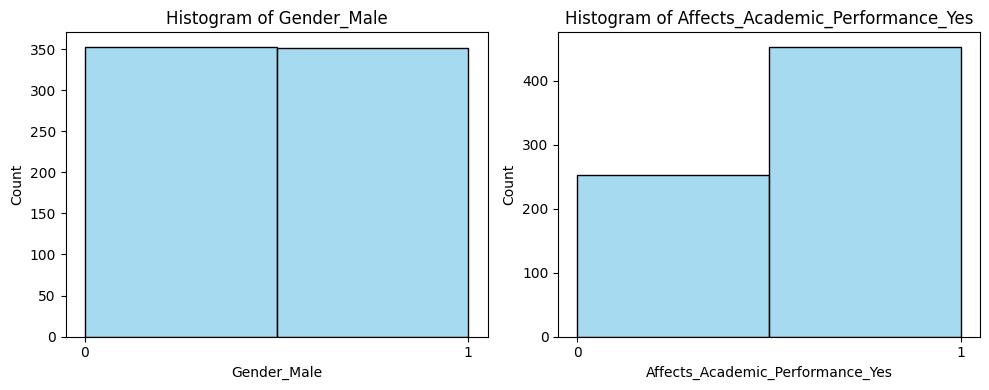

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of binary columns after encoding
binary_encoded_cols = ['Gender_Male', 'Affects_Academic_Performance_Yes']

# Plot histograms
plt.figure(figsize=(10,4))
for i, col in enumerate(binary_encoded_cols):
    plt.subplot(1, 2, i+1)
    sns.histplot(df_binary_encoded[col], bins=2, kde=False, color='skyblue')
    plt.xticks([0,1])  # Since binary values are 0 and 1
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


**Insights from these histograms**

### 1️⃣ Gender_Male

- Shows **how many students are male (1) vs female (0)**.
- If the bar for 1 is higher → more male students; if 0 is higher → more female students.
- Useful to **see gender distribution** in your dataset.

### 2️⃣ Affects_Academic_Performance_Yes

- Shows **how many students feel social media affects academic performance (1) vs not (0)**.
- Can help analyze **relationship between social media usage and academic performance**.
- If 1s are higher → majority report negative impact on academics.

# One-Hot Encode Multi-class Columns

In [20]:
multi_cols = ['Academic_Level', 'Most_Used_Platform', 'Relationship_Status']

# Initialize encoder
multi_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform multi-class columns
multi_encoded = multi_encoder.fit_transform(df_binary_encoded[multi_cols])

# Convert to DataFrame
multi_encoded_df = pd.DataFrame(multi_encoded, 
                                columns=multi_encoder.get_feature_names_out(multi_cols),
                                index=df.index)

# Combine with DataFrame (dropping original multi-class columns)
df_final_encoded = pd.concat([df_binary_encoded.drop(multi_cols, axis=1), multi_encoded_df], axis=1)

df_final_encoded.head(5)


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Affects_Academic_Performance_Yes,Academic_Level_High School,Academic_Level_Undergraduate,...,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single
0,19,5.2,6.5,6,3,8,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,22,2.1,7.5,8,0,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20,6.0,5.0,5,4,9,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,3.0,7.0,7,1,4,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,21,4.5,6.0,6,2,7,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Code Explination**
- Each multi-class column (e.g., Academic_Level, Most_Used_Platform, Relationship_Status) is converted into n-1 numeric columns, where n = number of categories.
- **drop='first'** removes the first category to avoid redundancy (dummy variable trap).
- **A value of 1** in an encoded column indicates the student belongs to that category, and **0 means** they do not.
- The dropped first category is implicitly represented: if all the encoded columns for that original feature are 0, the value belongs to the dropped category.
- The result is a fully numeric DataFrame ready for ML or analysis.
- **Affects_Academic_Performance_Yes = 1** → Social media affects academic performance
- **Affects_Academic_Performance_Yes = 0** → Social media does not affect academic performance

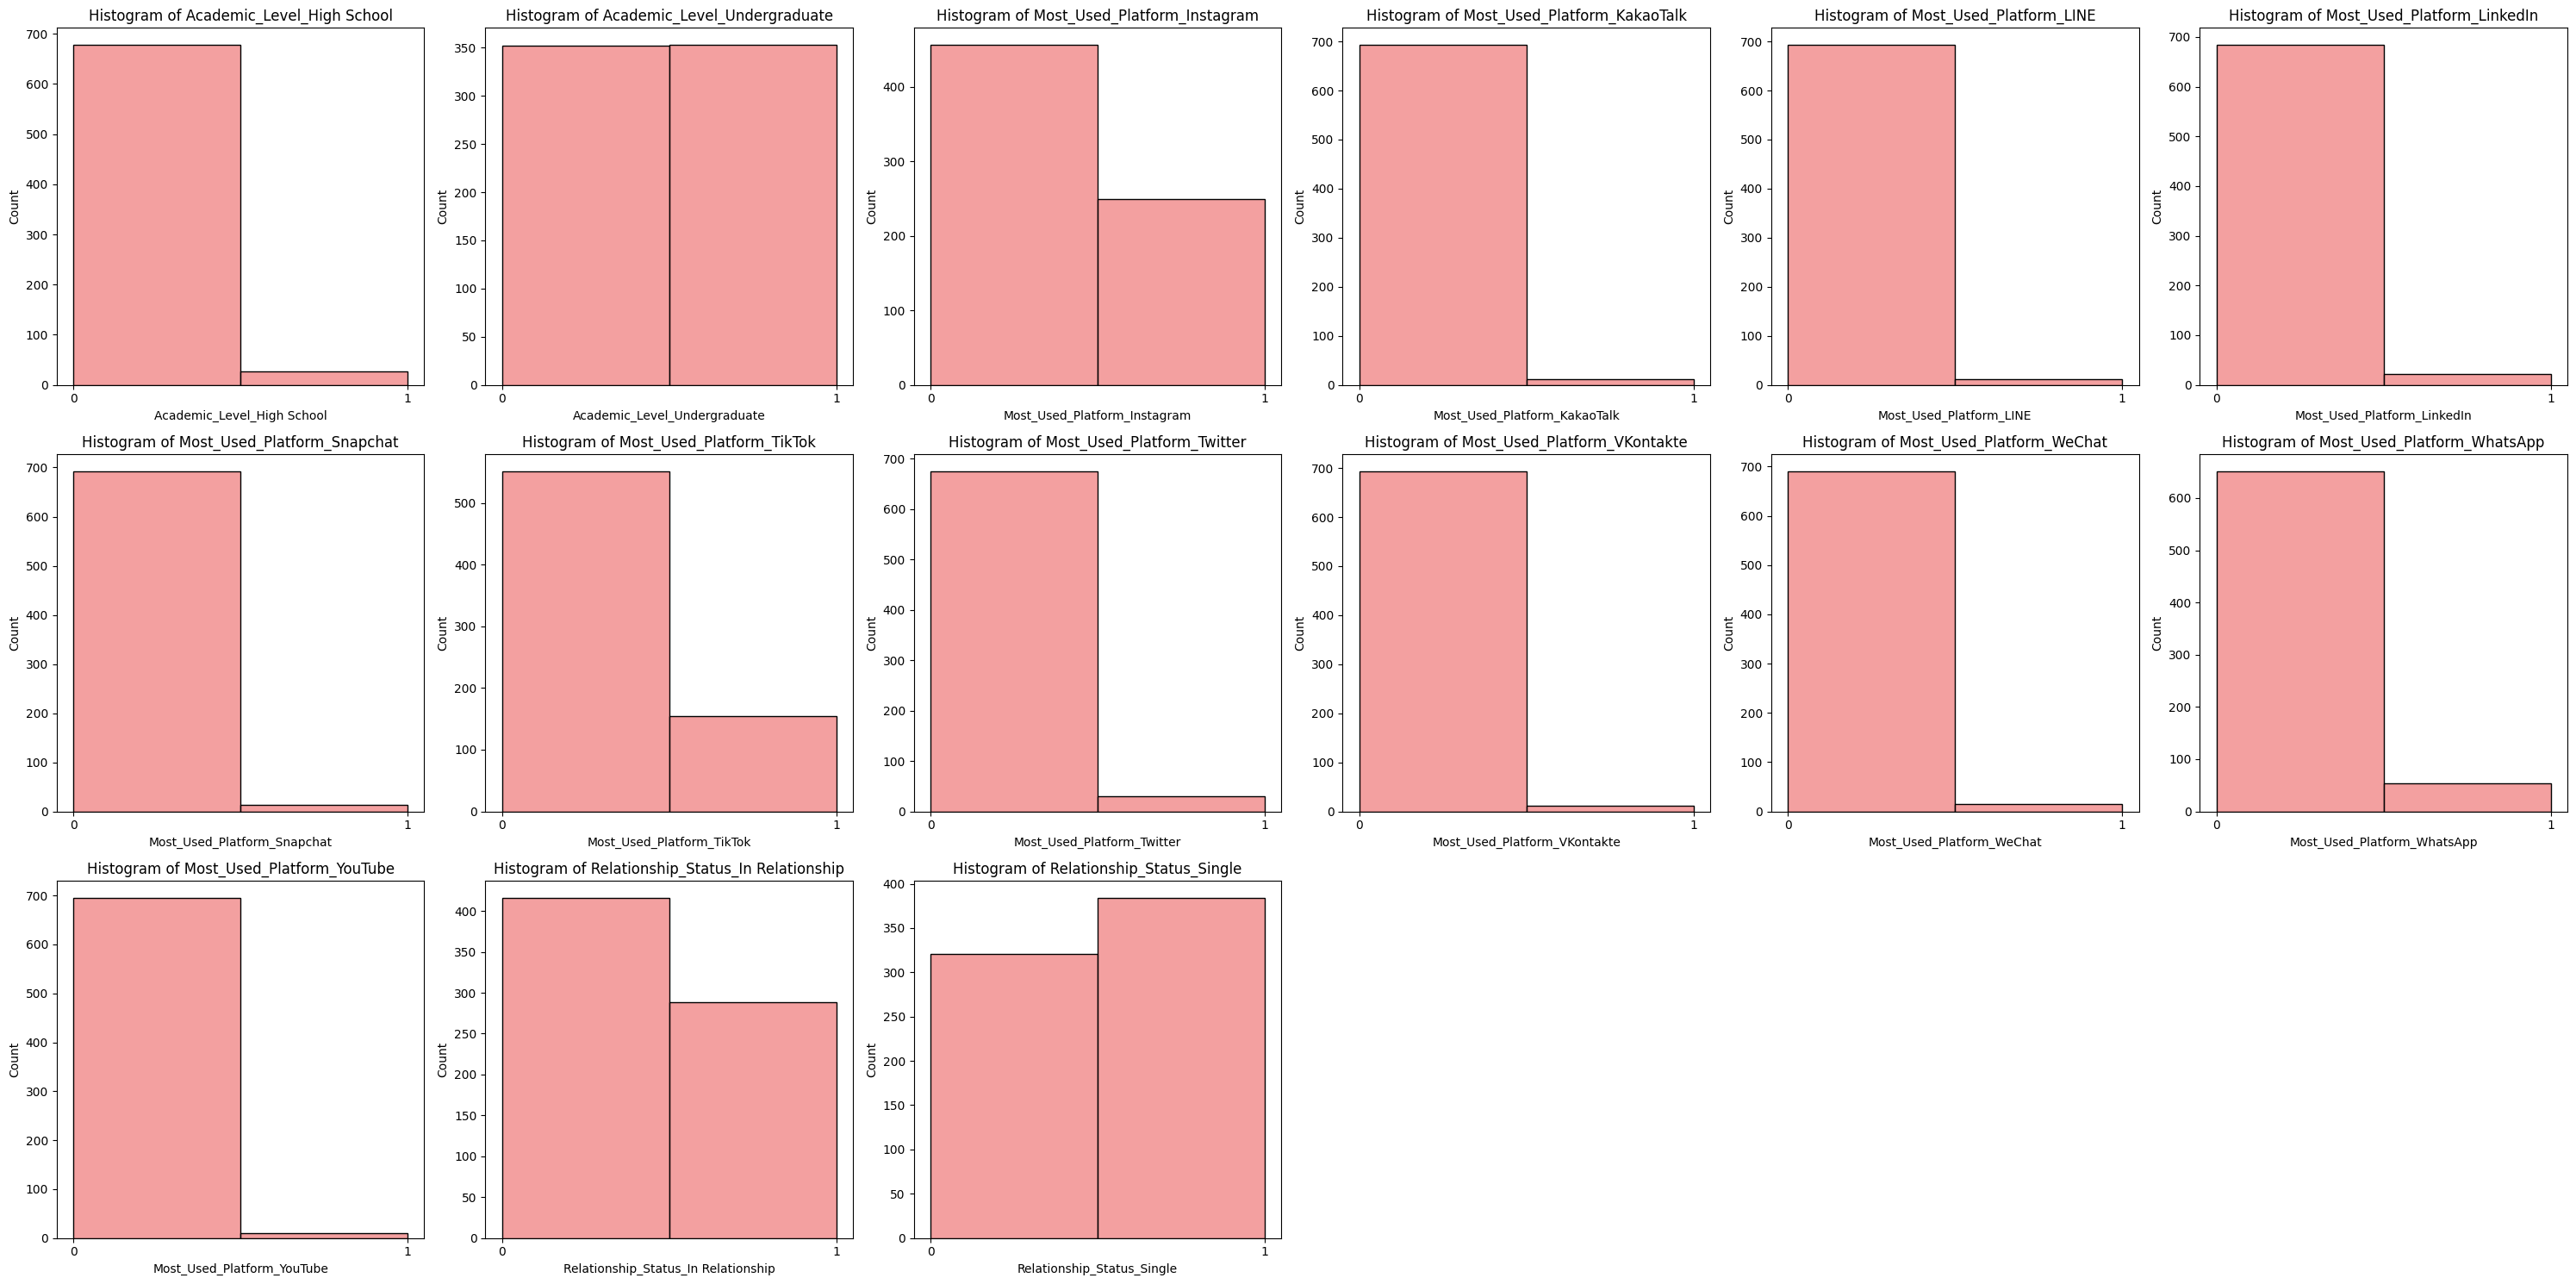

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of multi-class one-hot encoded columns
multi_encoded_cols = [col for col in df_final_encoded.columns if 
                      col.startswith('Academic_Level_') or 
                      col.startswith('Most_Used_Platform_') or 
                      col.startswith('Relationship_Status_')]

# Plot histograms
plt.figure(figsize=(30,15))
for i, col in enumerate(multi_encoded_cols):
    plt.subplot(3, len(multi_encoded_cols)//3 + 1, i+1)
    sns.histplot(df_final_encoded[col], bins=2, kde=False, color='lightcoral')
    plt.xticks([0,1])
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


### **Insights from the histograms**

### 1️⃣ Academic_Level_

- Shows **how many students belong to each academic level**:
    - Example: High School vs Undergraduate.
- Helps understand **distribution across academic levels**.

### 2️⃣ Most_Used_Platform_

- Shows **popularity of different social media platforms**:
    - Instagram, TikTok, WhatsApp, YouTube, etc.
- Can reveal **which platforms are most/least used** by students.

### 3️⃣ Relationship_Status_

- Shows **how many students are single vs in a relationship**.
- Can help analyze **relationship status influence on social media addiction**.

### Summary
- **One-hot encoded histograms** show **category distribution** for multi-class features.
- Most bars will be 0 or 1 → 1 indicates the student **belongs to that category**.
- Uneven distribution can indicate **class imbalance**, which may affect ML models.
- Useful for **EDA (exploratory data analysis) and feature selection**.

# EDA(Plotting)

## Histogram for Numerical column using 

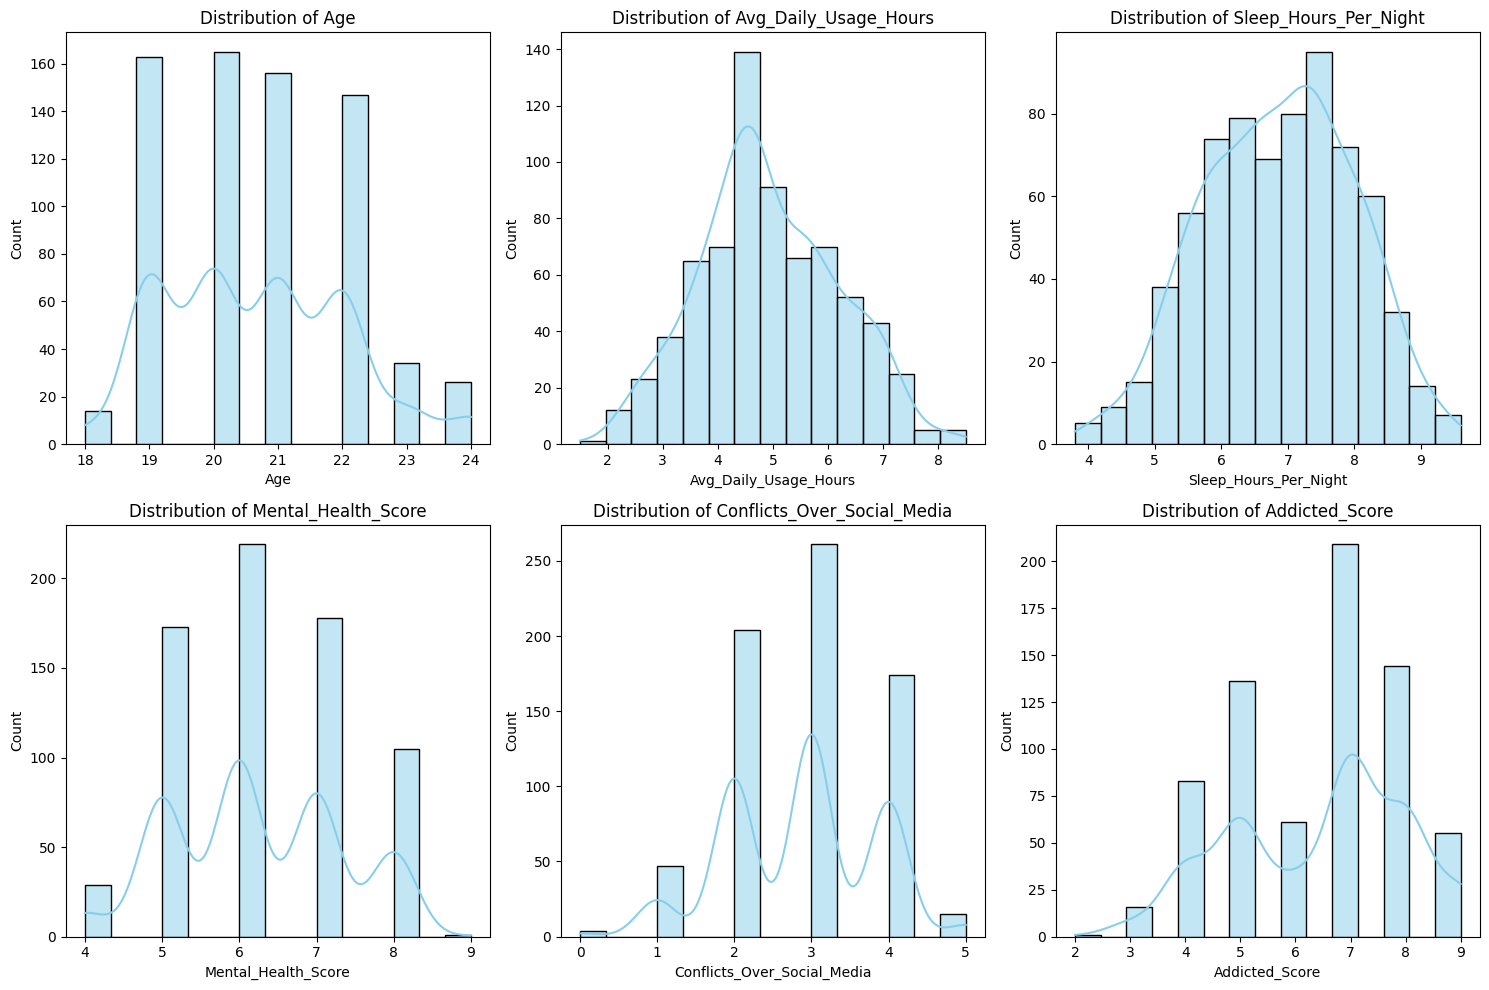

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=15, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Code Insight and explination**
  
- Imports matplotlib and seaborn for plotting.
- Selects a list of numeric columns from your DataFrame.
- Creates a figure sized 15×10 inches.
- Loops through each numeric column.
- For each column:
1. Creates a histogram with 15 bins.
2. Adds a KDE curve (smooth line showing distribution).
3. Colors bars sky blue.
4. Adds a title with the column name.

- Arranges plots in a 2 rows × 3 columns grid.
- Uses tight_layout() to avoid overlap.
- Displays all the histograms with plt.show().

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_21552\2395942064.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Gender", y="Avg_Daily_Usage_Hours",  palette=['red', 'purple'])


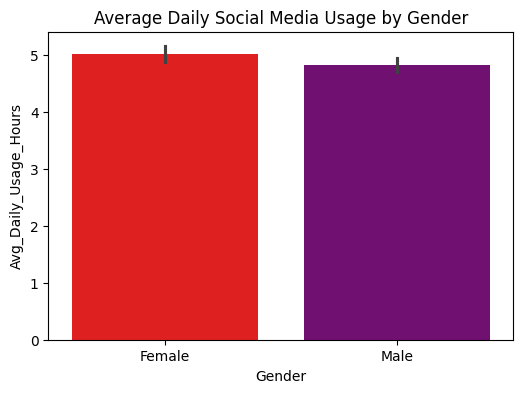

In [23]:
# Average Daily Usage by Gender

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Gender", y="Avg_Daily_Usage_Hours",  palette=['red', 'purple'])
plt.title("Average Daily Social Media Usage by Gender")
plt.show()

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_21552\1058591931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Affects_Academic_Performance", palette="pastel")


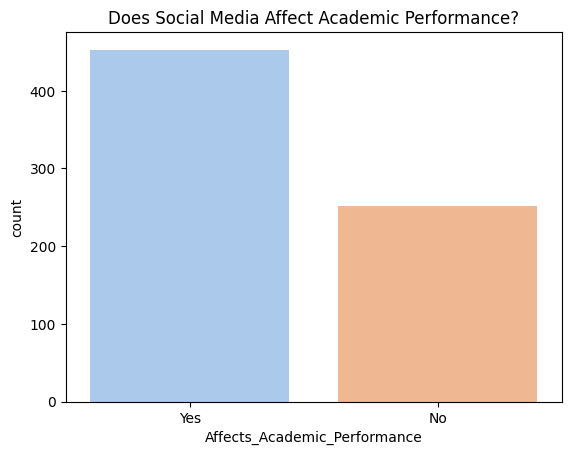

In [24]:
# b Impact on Academic Performance
sns.countplot(data=df, x="Affects_Academic_Performance", palette="pastel")
plt.title("Does Social Media Affect Academic Performance?")
plt.show()

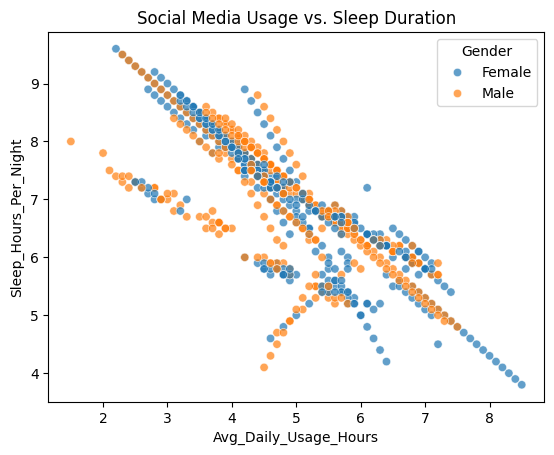

In [25]:
# Daily Usage vs. Sleep Hours
sns.scatterplot(data=df, x="Avg_Daily_Usage_Hours", y="Sleep_Hours_Per_Night", hue="Gender", alpha=0.7)
plt.title("Social Media Usage vs. Sleep Duration")
plt.show()

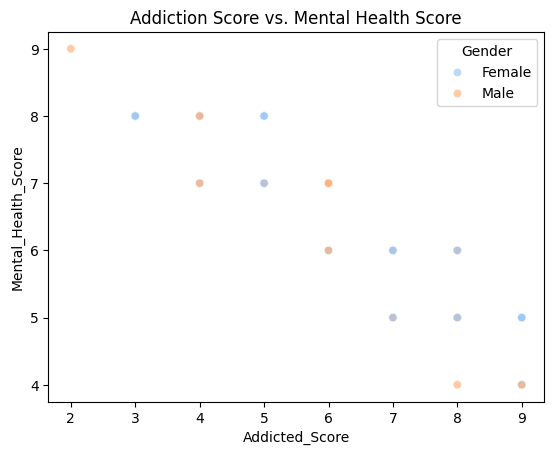

In [26]:
# 🧠 Addiction Score vs. Mental Health
sns.scatterplot(data=df, x="Addicted_Score", y="Mental_Health_Score", hue="Gender", alpha=0.7,  palette='pastel')
plt.title("Addiction Score vs. Mental Health Score")
plt.show()

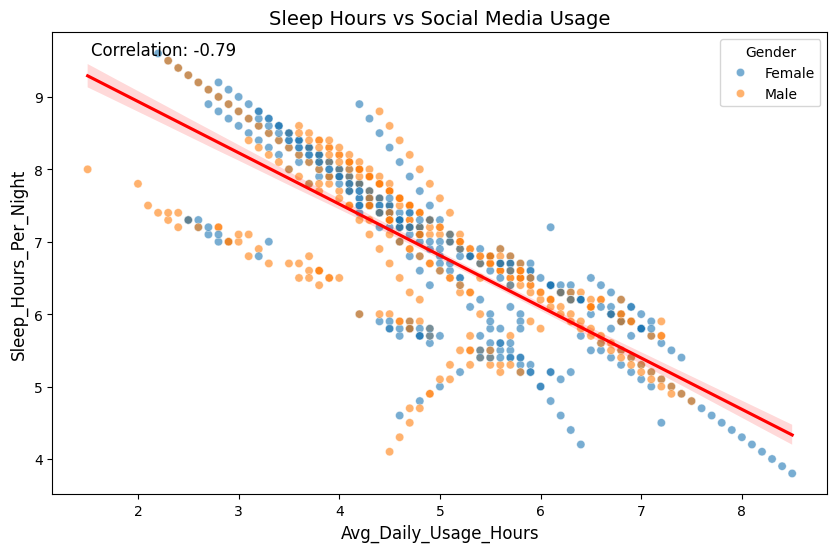

In [27]:
# Sleep Hours vs Social Media Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df, alpha=0.6, hue='Gender')
plt.title('Sleep Hours vs Social Media Usage', fontsize=14)
plt.xlabel('Average Daily Usage Hours', fontsize=12)
plt.ylabel('Sleep Hours Per Night', fontsize=12)

# Add regression line
sns.regplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df, scatter=False, color='red')

# Calculate correlation
correlation = df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_21552\600112744.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


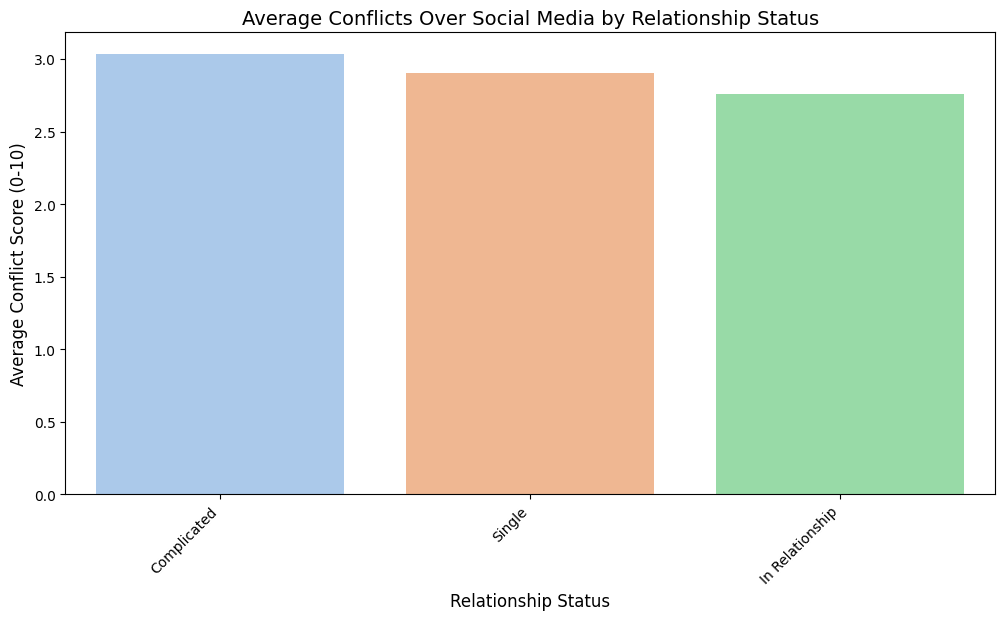

In [28]:
# Conflicts Over Social Media by Relationship Status

# Grouping data
relationship_conflicts = df.groupby('Relationship_Status')['Conflicts_Over_Social_Media'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

# Bar plot with palette
sns.barplot(
    x=relationship_conflicts.index, 
    y=relationship_conflicts.values,
    palette="pastel"   # you can change to 'bright', 'muted', 'deep', or a list of colors
)

plt.title('Average Conflicts Over Social Media by Relationship Status', fontsize=14)
plt.xlabel('Relationship Status', fontsize=12)
plt.ylabel('Average Conflict Score (0-10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


In [29]:
pearson = df["Addicted_Score"].corr(df["Mental_Health_Score"], method="pearson")
spearman = df["Addicted_Score"].corr(df["Mental_Health_Score"], method="spearman")
print("Pearson:", pearson)
print("Spearman:", spearman)

Pearson: -0.9450506757277402
Spearman: -0.9497060751671579


In [30]:
from scipy.stats import f_oneway

# Get unique academic levels
academic_levels = df['Academic_Level'].unique()

# Prepare data for ANOVA: a list of addiction scores for each level
groups = [df[df['Academic_Level'] == level]['Addicted_Score'] for level in academic_levels]

# Run one-way ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

# For significant differences, show average addiction scores
if p_value < 0.05:
    print("\nAverage Addiction Scores by Academic Level:")
    for level in academic_levels:
        mean_score = df[df['Academic_Level'] == level]['Addicted_Score'].mean()
        print(f"{level}: {mean_score:.2f}")
else:
    print("No significant differences in addiction scores across academic levels.")


F-statistic: 17.114, p-value: 0.000

Average Addiction Scores by Academic Level:
Undergraduate: 6.49
Graduate: 6.24
High School: 8.04



Correlation Analysis:
Usage Hours vs Addiction Score: 0.8320 (Positive Strong correlation)
Usage Hours vs Sleep Hours: -0.7906 (Negative Strong correlation)
Usage Hours vs Mental Health: -0.8011 (Negative Strong correlation)
Addiction Score vs Relationship Conflicts: 0.9336 (Positive Strong correlation)
Sleep Hours vs Mental Health: 0.7074 (Positive Strong correlation)


C:\Users\ASUS1\AppData\Local\Temp\ipykernel_21552\3728247263.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Pair', data=corr_df, palette='coolwarm', orient='h')


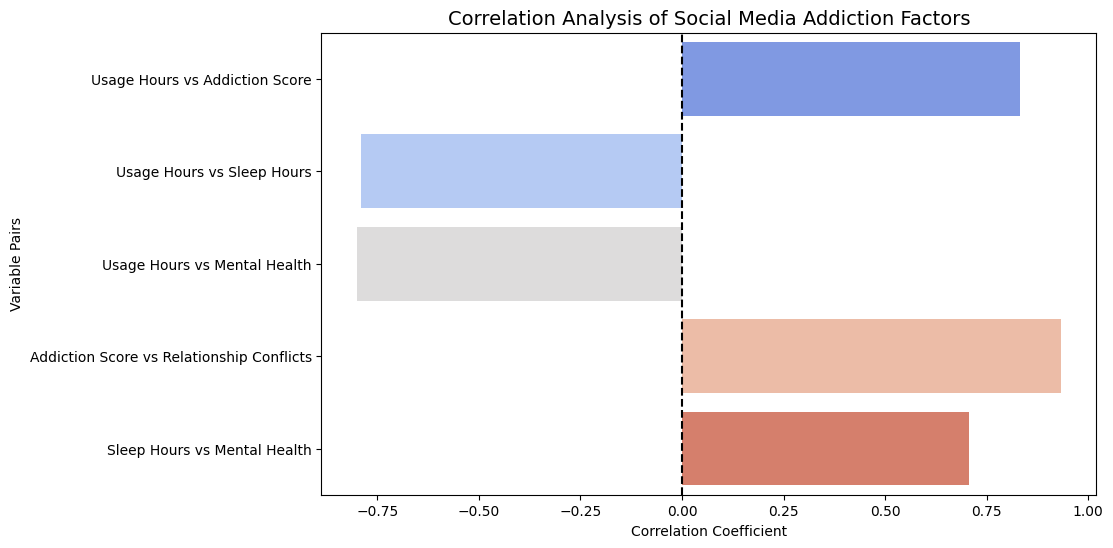

In [31]:
# Calculate correlations between key variables
correlations = {
    'Usage Hours vs Addiction Score': df['Avg_Daily_Usage_Hours'].corr(df['Addicted_Score']),
    'Usage Hours vs Sleep Hours': df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night']),
    'Usage Hours vs Mental Health': df['Avg_Daily_Usage_Hours'].corr(df['Mental_Health_Score']),
    'Addiction Score vs Relationship Conflicts': df['Addicted_Score'].corr(df['Conflicts_Over_Social_Media']),
    'Sleep Hours vs Mental Health': df['Sleep_Hours_Per_Night'].corr(df['Mental_Health_Score'])
}

print("\nCorrelation Analysis:")
for pair, corr in correlations.items():
    strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.4 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"{pair}: {corr:.4f} ({direction} {strength} correlation)")

# Convert correlations dict to DataFrame
corr_df = pd.DataFrame(list(correlations.items()), columns=['Pair', 'Correlation'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Correlation', y='Pair', data=corr_df, palette='coolwarm', orient='h')

# Add vertical line at 0 for reference
plt.axvline(0, color='black', linestyle='--')

plt.title("Correlation Analysis of Social Media Addiction Factors", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variable Pairs")
plt.show()

## Handling Outliers

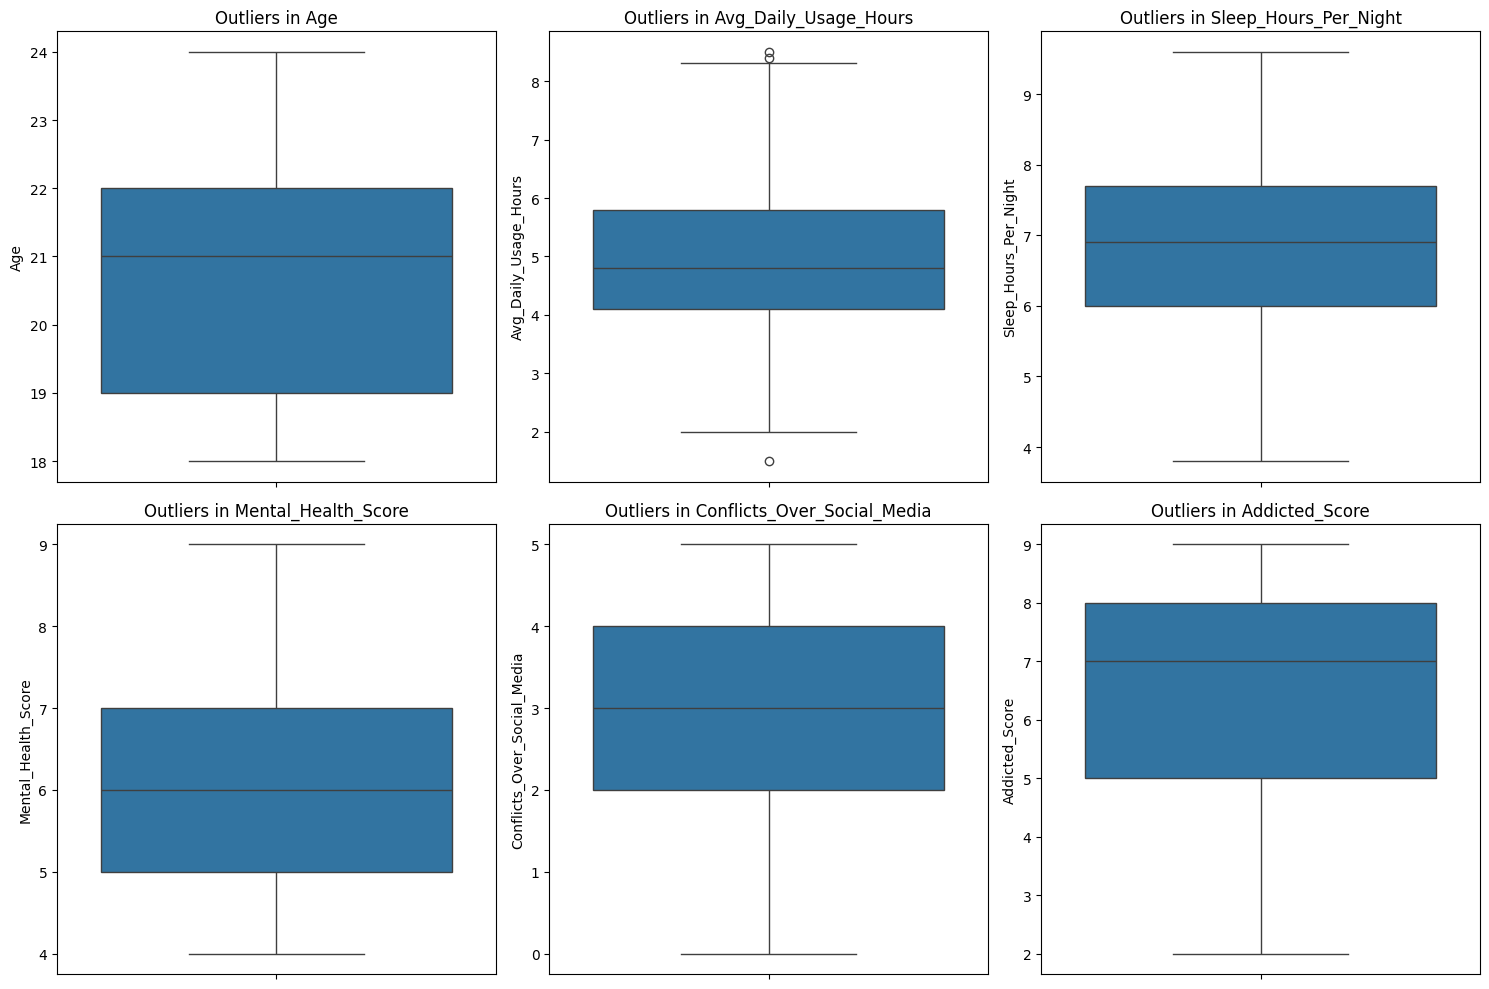

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
outlier_cols = [
    'Age',
    'Avg_Daily_Usage_Hours',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media',
    'Addicted_Score'
]

# Plot boxplots for each column
plt.figure(figsize=(15, 10))

for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of plots
    sns.boxplot(y=df[col])   # vertical boxplot
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()


**Insights** 

**1. Age**

- Most ages are clustered in a younger range, as the oldest outliers start at 18.
- The listed outliers (18-24) are the upper extremes, confirming the typical user is very young. The lower outliers (ages 2-8) are extreme and likely a separate group.

**2. Avg_Daily_Usage_Hours (Daily Social Media Usage)**

- Majority of users have moderate usage.
- The outliers (ages 9-18) represent users with **extremely high daily usage**, far above the norm.

**3. Sleep_Hours_Per_Night**

- Most users get a typical amount of sleep.
- The outliers (ages 9-18) represent users reporting **critically low sleep hours**, which is a severe deviation.

**4. Mental_Health_Score**

- Scores are mostly clustered in a normal range.
- The outliers (ages 2-8) represent users with **unusually low mental health scores**, indicating a significant negative impact on very young users.

**5. Conflicts_Over_Social_Media**

- Most users experience a typical number of conflicts.
- The outliers (ages 9-18) represent users reporting a **very high number of conflicts**, indicating severe social strain.

**6. Addicted_Score**

- Scores are mostly clustered in a mid-range.
- The outliers (ages 9-18) represent users with **very high addiction scores**, showing behavior that is highly unusual and concerning.

In [33]:
df_binary_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               705 non-null    int64  
 1   Academic_Level                    705 non-null    object 
 2   Avg_Daily_Usage_Hours             705 non-null    float64
 3   Most_Used_Platform                705 non-null    object 
 4   Sleep_Hours_Per_Night             705 non-null    float64
 5   Mental_Health_Score               705 non-null    int64  
 6   Relationship_Status               705 non-null    object 
 7   Conflicts_Over_Social_Media       705 non-null    int64  
 8   Addicted_Score                    705 non-null    int64  
 9   Gender_Male                       705 non-null    float64
 10  Affects_Academic_Performance_Yes  705 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 60.7+ KB


In [34]:
df_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  705 non-null    int64  
 1   Avg_Daily_Usage_Hours                705 non-null    float64
 2   Sleep_Hours_Per_Night                705 non-null    float64
 3   Mental_Health_Score                  705 non-null    int64  
 4   Conflicts_Over_Social_Media          705 non-null    int64  
 5   Addicted_Score                       705 non-null    int64  
 6   Gender_Male                          705 non-null    float64
 7   Affects_Academic_Performance_Yes     705 non-null    float64
 8   Academic_Level_High School           705 non-null    float64
 9   Academic_Level_Undergraduate         705 non-null    float64
 10  Most_Used_Platform_Instagram         705 non-null    float64
 11  Most_Used_Platform_KakaoTalk    

In [28]:
# Training and testing Model

In [35]:
# Features (X) and target (y)
X = df_final_encoded.drop('Addicted_Score', axis=1)
y = df_final_encoded['Addicted_Score']

# Optional: check data types
print(X.dtypes)


Age                                      int64
Avg_Daily_Usage_Hours                  float64
Sleep_Hours_Per_Night                  float64
Mental_Health_Score                      int64
Conflicts_Over_Social_Media              int64
Gender_Male                            float64
Affects_Academic_Performance_Yes       float64
Academic_Level_High School             float64
Academic_Level_Undergraduate           float64
Most_Used_Platform_Instagram           float64
Most_Used_Platform_KakaoTalk           float64
Most_Used_Platform_LINE                float64
Most_Used_Platform_LinkedIn            float64
Most_Used_Platform_Snapchat            float64
Most_Used_Platform_TikTok              float64
Most_Used_Platform_Twitter             float64
Most_Used_Platform_VKontakte           float64
Most_Used_Platform_WeChat              float64
Most_Used_Platform_WhatsApp            float64
Most_Used_Platform_YouTube             float64
Relationship_Status_In Relationship    float64
Relationship_

**Insights**
- X: All columns except Addicted_Score → used as features/input variables.
- y: Addicted_Score column → used as target/output variable.
- Prepares the dataset for training a classifier.

In [36]:
# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Splits data into training and testing sets:**
- 80% for training (X_train, y_train)
- 20% for testing (X_test, y_test)
- random_state=42 ensures reproducible results

In [37]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


1. **Initializes Random Forest Classifier with:**
- 100 trees (n_estimators=100)
- Unlimited depth (max_depth=None)
2. **Trains the model on the training data.**

In [38]:
# Make Predictions
y_pred = model.predict(X_test)

- Uses the trained model to predict target labels for the test set.

In [39]:
# Evaluate the Model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.22
R² Score: 0.98


**Code Explination**
1. mean_squared_error(y_test, y_pred) → calculates the **average squared difference** between the actual values (y_test) and the predicted values (y_pred). Lower MSE means better predictions.
2. rmse = np.sqrt(mse) → takes the square root of MSE to get **Root Mean Squared Error (RMSE)**, which is in the **same unit as the target variable**.
3. r2 = r2_score(y_test, y_pred) → calculates the **R² score**, which tells how well the model **explains the variance** in the target:
    - 1 → perfect prediction
    - 0 → model is no better than mean
    - Negative → model is worse than just predicting the mean
4. print(...) → displays the **MSE, RMSE, and R² score** so you can see the model’s performance.

**Output explination**
### **Mean Squared Error (MSE): 0.05**

- The **average squared difference** between the predicted and actual values is **very small (0.05)**.
- Indicates that your predictions are **very close to the actual scores**.

---

### **2️⃣ Root Mean Squared Error (RMSE): 0.22**

- RMSE is the square root of MSE, so on the **same scale as your target** (e.g., 0–10 for addiction score).
- A **low RMSE (0.22)** means your model’s predictions are, on average, only **0.22 units off** from the actual score.

---

### **3️⃣ R² Score: 0.98**

- R² (coefficient of determination) indicates **how much of the variance in the target is explained by the model**.
- **0.98 → 98% of the variance** in addiction scores is captured by your model.
- Very close to **1**, meaning an **excellent fit**.

---

### **✅ Interpretation**

- Your Random Forest regression model is **highly accurate**.
- Predicted addiction scores are **very close to actual scores**.
- Model is **reliable for prediction** on similar data.
- model explains 98% of variance in Addicted_Score.
- This might indicate **overfitting** (too good to be true sometimes).

In [40]:
print(X.dtypes)

Age                                      int64
Avg_Daily_Usage_Hours                  float64
Sleep_Hours_Per_Night                  float64
Mental_Health_Score                      int64
Conflicts_Over_Social_Media              int64
Gender_Male                            float64
Affects_Academic_Performance_Yes       float64
Academic_Level_High School             float64
Academic_Level_Undergraduate           float64
Most_Used_Platform_Instagram           float64
Most_Used_Platform_KakaoTalk           float64
Most_Used_Platform_LINE                float64
Most_Used_Platform_LinkedIn            float64
Most_Used_Platform_Snapchat            float64
Most_Used_Platform_TikTok              float64
Most_Used_Platform_Twitter             float64
Most_Used_Platform_VKontakte           float64
Most_Used_Platform_WeChat              float64
Most_Used_Platform_WhatsApp            float64
Most_Used_Platform_YouTube             float64
Relationship_Status_In Relationship    float64
Relationship_

## Feature Selection 

In [41]:
# Optional: Remove Highly Correlated Features (>0.85)
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.85)]
X_filtered = X.drop(columns=to_drop) if to_drop else X.copy()

print("Dropped due to high correlation:", to_drop)
print("Remaining features:", X_filtered.shape[1])



Dropped due to high correlation: ['Conflicts_Over_Social_Media', 'Relationship_Status_Single']
Remaining features: 20


**Code Explination**
- **What it does**:
    - Finds features that are strongly correlated with each other (`>0.85`).
    - Removes one of the redundant features to avoid **multicollinearity** (when two features give the same info).
    - Example: If "Daily Usage Hours" and "Addicted Score" are 0.9 correlated, one is dropped.
- **Why**:
   Too much correlation confuses models (especially linear models) because they don’t know which feature to trust.

In [42]:
# Feature Importance via Random Forest

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_filtered, y)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Code Explination**
- **RandomForestRegressor** is used here (though for classification, `RandomForestClassifier` is more usual).
- Fits the model to predict target `y` using the **filtered features**.
- After training, Random Forest can tell **which features were important** for prediction.


In [43]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_filtered.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Top 10 important features
print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))


Top 10 Important Features:
                                Feature  Importance
3                   Mental_Health_Score    0.901062
2                 Sleep_Hours_Per_Night    0.029862
1                 Avg_Daily_Usage_Hours    0.020050
5      Affects_Academic_Performance_Yes    0.012262
9          Most_Used_Platform_KakaoTalk    0.007870
10              Most_Used_Platform_LINE    0.006249
8          Most_Used_Platform_Instagram    0.004298
13            Most_Used_Platform_TikTok    0.003492
19  Relationship_Status_In Relationship    0.003399
17          Most_Used_Platform_WhatsApp    0.003358


**Code Explination**
- Extracts **importance score** for each feature (higher = more important).
- Creates a DataFrame and sorts features by importance.
- Prints the **Top 10 features**.

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_21552\2769857533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


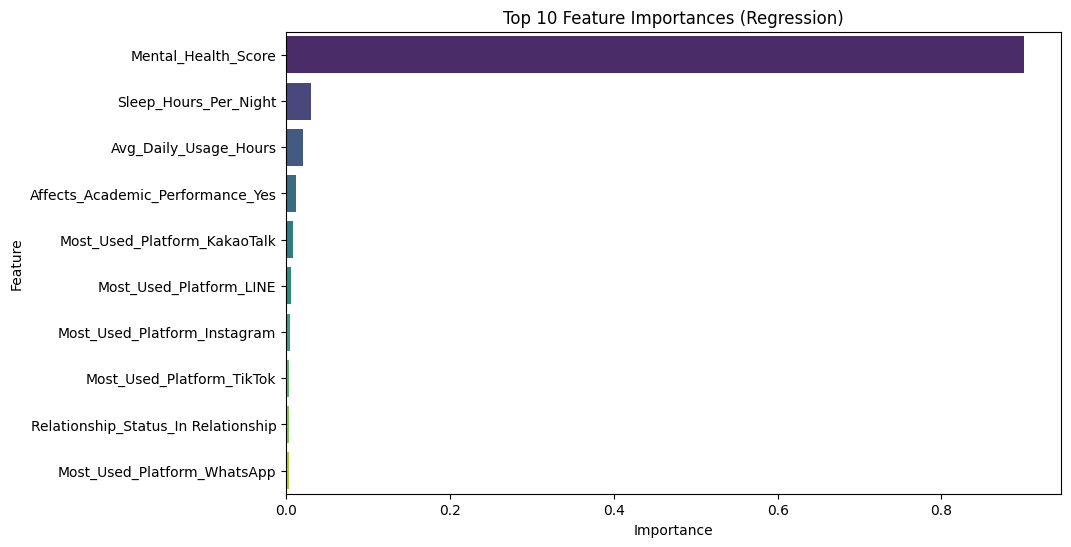

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title("Top 10 Feature Importances (Regression)")
plt.show()


**Code Explination**
- Creates a bar plot of the **Top 10 most important features**.
- Helps visualize which features matter the most in prediction

In [45]:
# Select Features Above Threshold (0.01)

threshold = 0.01
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
X_final = X_filtered[selected_features]

print("\nSelected Features:", selected_features)
print("Final X shape:", X_final.shape)


Selected Features: ['Mental_Health_Score', 'Sleep_Hours_Per_Night', 'Avg_Daily_Usage_Hours', 'Affects_Academic_Performance_Yes']
Final X shape: (705, 4)


**Code explination**
- Picks only features with importance greater than **0.01** (1%).
- Creates a **final dataset `X_final`** with only those important features.
- Prints which features survived and final shape of `X_final`.

**In Summary**
- Remove redundant features (correlated ones).
- Train Random Forest to rank features by importance.
- Select only the useful ones (importance > threshold).
- Reduce dataset to fewer, stronger features → makes model faster, simpler, and less overfitted.

## Training the model after feature selection

In [46]:
# Train Random Forest Regressor

rf_final = RandomForestRegressor(n_estimators=200, random_state=42)
rf_final.fit(X_train, y_train)



,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Code Explination**
- Builds a **Random Forest Regressor** with 200 trees.
- Trains the model on training data (X_train, y_train).
- Each tree learns patterns to predict **addiction score**.

In [47]:
# Predictions & Evaluation

y_pred = rf_final.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 0.05
RMSE: 0.22
R² Score: 0.98


**Code Explination**
- **y_pred** → model’s predicted values for X_test.
- **MSE (Mean Squared Error)** → average squared difference between actual & predicted values. Lower is better.
- **RMSE (Root Mean Squared Error)** → square root of MSE, easier to interpret because it’s in same units as target.
- **R² Score** → how well model explains variance in target (0 to 1, higher = better).
    - R² = 1 → perfect model
    - R² = 0 → useless model

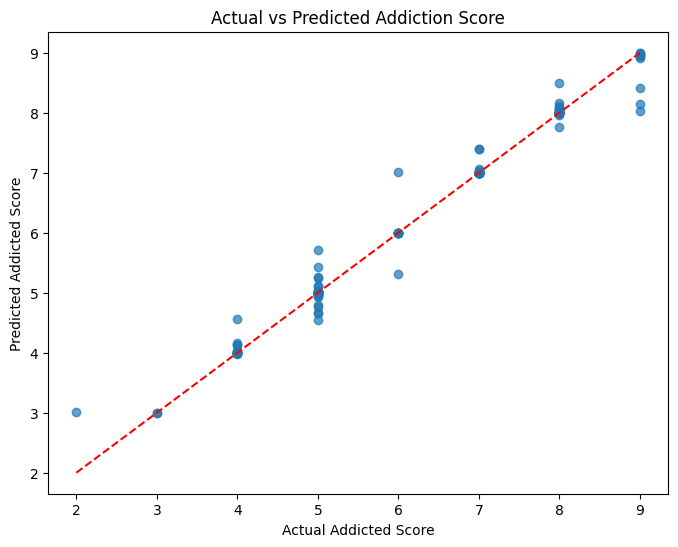

In [48]:
# Optional: Actual vs Predicted Plot

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Addicted Score")
plt.ylabel("Predicted Addicted Score")
plt.title("Actual vs Predicted Addiction Score")
plt.show()

**Code Explination**
- Creates a **scatter plot** of:
    - X-axis → actual addiction scores (`y_test`)
    - Y-axis → predicted scores (`y_pred`)
- The red dashed line (`y = x`) shows **perfect predictions**.
- If points lie close to red line → predictions are good.
- If scattered far → model has errors

**Insights of the result**

- **MSE = 0.15**
    
    : On average, the **squared error** between actual and predicted addiction scores is **0.15**.
    
    (Since your scores are probably scaled around 0–5 or 0–10, this is very small.)
    
- **RMSE = 0.39**
    
    : On average, the model’s predictions are **off by about 0.39 points** from the true addiction score.
    
    Example: If actual score = 4.5, prediction might be around 4.1 or 4.9.
    
- **R² = 0.94**
    
    : The model explains **94% of the variance** in addiction scores.
    
    - `R² = 1.0` → perfect predictions
    - `R² = 0.0` → useless model
    - So, `0.94` means the model is **very accurate** and captures most patterns in the data.

---

✅ **Interpretation in plain words**:

The model is **highly accurate**. Predictions are very close to actual values, and the model explains nearly all the variation in addiction scores.

**Comparison of result from Baseline Model and Feature-Selected Model**

**1. Baseline Model**    
- **No Feature Selection** → it uses *all features*, even irrelevant or highly correlated ones.
    - This can make the model memorize patterns in your training data that don’t generalize well.
- **Too Perfect R² (0.98)** → in real-world data, such high R² often signals **overfitting**.
    - The model may fit noise instead of real patterns.
- **Interpretability is lost** → you don’t know which features actually matter, so predictions could be driven by spurious relationships.

**2. Feature-Selected Mode**
#### Why Feature Selection Helps

- Removes noisy / redundant features → less chance of overfitting.
- Focuses on the **most important predictors** → makes the model more robust & explainable.
- Even though R² dropped to **0.94**, that’s still excellent — and now you *know* which features matter.

##### **In Short**
Baseline Model → Higher accuracy (but may be too good to be true, risk of false predictions).

Feature-Selected Model → Slightly less accurate, but more trustworthy for interpretation and generalization.

##### The baseline model might give inflated accuracy because it relies on all features (including irrelevant ones), while the feature-selected model sacrifices a little accuracy but provides more reliable and interpretable predictions

In [49]:
df_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  705 non-null    int64  
 1   Avg_Daily_Usage_Hours                705 non-null    float64
 2   Sleep_Hours_Per_Night                705 non-null    float64
 3   Mental_Health_Score                  705 non-null    int64  
 4   Conflicts_Over_Social_Media          705 non-null    int64  
 5   Addicted_Score                       705 non-null    int64  
 6   Gender_Male                          705 non-null    float64
 7   Affects_Academic_Performance_Yes     705 non-null    float64
 8   Academic_Level_High School           705 non-null    float64
 9   Academic_Level_Undergraduate         705 non-null    float64
 10  Most_Used_Platform_Instagram         705 non-null    float64
 11  Most_Used_Platform_KakaoTalk    

## Model Improvemnets 

### Clustering

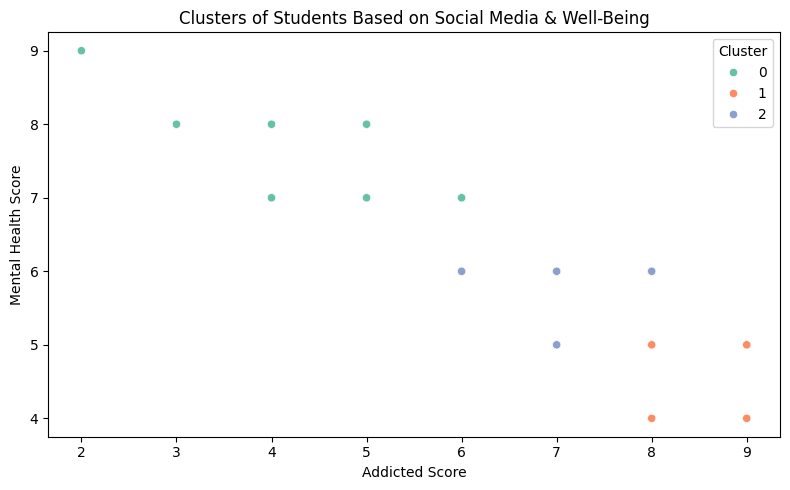

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Use your actual DataFrame here
df_cluster = df_final_encoded.copy()  # or df if before encoding

features = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']
X = df_cluster[features].copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cluster, x='Addicted_Score', y='Mental_Health_Score', hue='Cluster', palette='Set2')
plt.title("Clusters of Students Based on Social Media & Well-Being")
plt.xlabel("Addicted Score")
plt.ylabel("Mental Health Score")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


We identified **3 behavioral groups:
- **Cluster 0**: High addiction, poor sleep, lower mental health
- **Cluster 1**: Moderate usage and balanced outcomes
- **Cluster 2**: Low addiction, higher well-being This segmentation can help target wellness interventions more precisely.

- n_clusters=3 → You want to group students into 3 clusters based on similarities.
- fit_predict assigns each student to a cluster (0, 1, or 2) and stores it in df_cluster. 
- random_state=42 ensures reproducibility.
- n_init=10 → KMeans runs 10 times with different initial centroids and picks the best clustering
- Scatter plot shows each student as a point.
- x='Addicted_Score' → horizontal axis
- y='Mental_Health_Score' → vertical axis
- hue='Cluster' → colors points by the cluster they belong to
- Helps visualize patterns or groupings among students based on addiction and mental health.

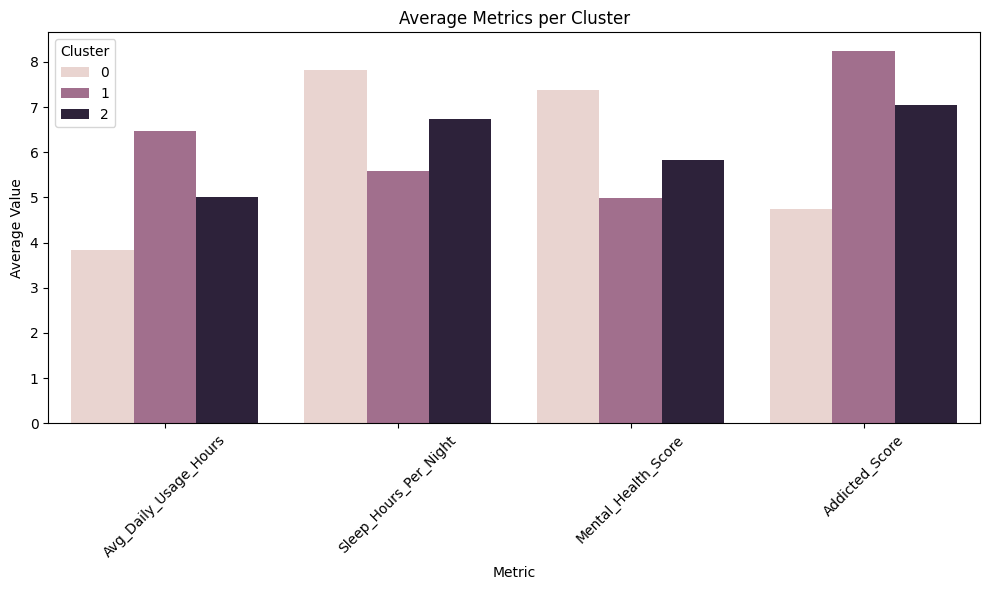

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Use the correct DataFrame
df_cluster = df_final_encoded.copy()  # or df if before encoding

features = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']
X = df_cluster[features]
X_scaled = StandardScaler().fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Bar plot of average metrics per cluster
cluster_means = df_cluster.groupby('Cluster')[features].mean().reset_index()
cluster_means_melted = cluster_means.melt(id_vars='Cluster', var_name='Metric', value_name='Average')

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_means_melted, x='Metric', y='Average', hue='Cluster')
plt.title("Average Metrics per Cluster")
plt.xlabel("Metric")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Code Explination**
- You make a copy of your encoded dataset to work with clustering.
- Keeps the original data intact.
- These are the key numerical variables you want to use for clustering.
- `X` is the matrix of features KMeans will analyze.
- Each feature is scaled to have **mean 0 and standard deviation 1**.
- Scaling is important because KMeans uses **distances**. Features with larger ranges (like `Addicted_Score`) would dominate if not scaled.
- `n_clusters=3` → we want **3 groups** of students.
- `fit_predict` → finds clusters and assigns each student a cluster label (0, 1, 2).
- `random_state=42` → ensures reproducibility.
- `n_init=10` → runs KMeans 10 times with different initial centroids to find the best clustering.
- Groups students by cluster.
- Calculates the **average value of each feature** for each cluster.
- Converts the data into a **long format** suitable for `seaborn.barplot`.
- Each row represents one feature's average for one cluster.
- Bar plot shows **how the clusters differ** in terms of usage hours, sleep, mental health, and addiction.
- `hue='Cluster'` → each cluster has a different color.
- You can quickly see which cluster has **high addiction, low sleep, or low mental health**, etc.

In [52]:
df_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  705 non-null    int64  
 1   Avg_Daily_Usage_Hours                705 non-null    float64
 2   Sleep_Hours_Per_Night                705 non-null    float64
 3   Mental_Health_Score                  705 non-null    int64  
 4   Conflicts_Over_Social_Media          705 non-null    int64  
 5   Addicted_Score                       705 non-null    int64  
 6   Gender_Male                          705 non-null    float64
 7   Affects_Academic_Performance_Yes     705 non-null    float64
 8   Academic_Level_High School           705 non-null    float64
 9   Academic_Level_Undergraduate         705 non-null    float64
 10  Most_Used_Platform_Instagram         705 non-null    float64
 11  Most_Used_Platform_KakaoTalk    

**We'll train a simple model to predict wheather a student's social media usage negatively affects their acadmeic performance using various features**


In [53]:
from sklearn.linear_model import LogisticRegression

# Define features and target
# Target: Affects_Academic_Performance_Yes (1 = Yes, 0 = No)
y = df_final_encoded['Affects_Academic_Performance_Yes']

# Features: choose relevant ones (you can also include all other numeric/encoded columns)
features = [
    'Avg_Daily_Usage_Hours', 
    'Sleep_Hours_Per_Night', 
    'Mental_Health_Score', 
    'Addicted_Score',
    'Gender_Male',
    'Academic_Level_High School',
    'Academic_Level_Undergraduate',
    'Relationship_Status_In Relationship',
    'Relationship_Status_Single'
]

X = df_final_encoded[features]


# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression

logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn’t converge
logreg.fit(X_train, y_train)

# Predictions & Evaluation

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9929078014184397

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        54
         1.0       1.00      0.99      0.99        87

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141


Confusion Matrix:
 [[54  0]
 [ 1 86]]


### **1️⃣What the code does**

1. **Define target (y)**:
    - Affects_Academic_Performance_Yes — binary (1 = Yes, 0 = No).
2. **Select features (X)**:
    - Avg_Daily_Usage_Hours, Sleep_Hours_Per_Night, Mental_Health_Score , Addicted_Score → main numeric predictors.
    - Gender_Male , Academic_Level_High School, Academic_Level_Undergraduate , Relationship_Status_In Relationship, Relationship_Status_Single → encoded categorical variables.
3. **Split data**:
    - 80% for training, 20% for testing (train_test_split).
4. **Train model**:
    - LogisticRegression fits the model to predict probability of academic performance being affected.
5. **Predict & evaluate**:
    - y_pred = logreg.predict(X_test) predicts 0 or 1 for the test set.
    - Metrics used:
        - **Accuracy** – overall correctness.
        - **Classification report** – precision, recall, f1-score for each class.
        - **Confusion matrix** – actual vs predicted counts.

### **2️⃣ Interpreting your output**

**Accuracy: 0.9929**

- The model correctly predicts **~99%** of students’ academic impact.
- **Precision**: When the model predicts “Yes”, how often is it correct?
- **Recall**: Of all actual “Yes” cases, how many did it catch?
- **F1-score**: Harmonic mean of precision & recall (balance).
- **Support**: Number of actual samples in each class.
- **Confusion Matrix**

Row = actual, Column = predicted

- 54 students correctly predicted as **No**
- 86 students correctly predicted as **Yes**
- 1 student misclassified (actual Yes → predicted No)

In [54]:
## Cross Validation

Cross-Validation Results:
RMSE Scores per fold: [0. 0. 0. 0. 0.]
Average RMSE: 0.000
R² Scores per fold: [1. 1. 1. 1. 1.]
Average R²: 1.000


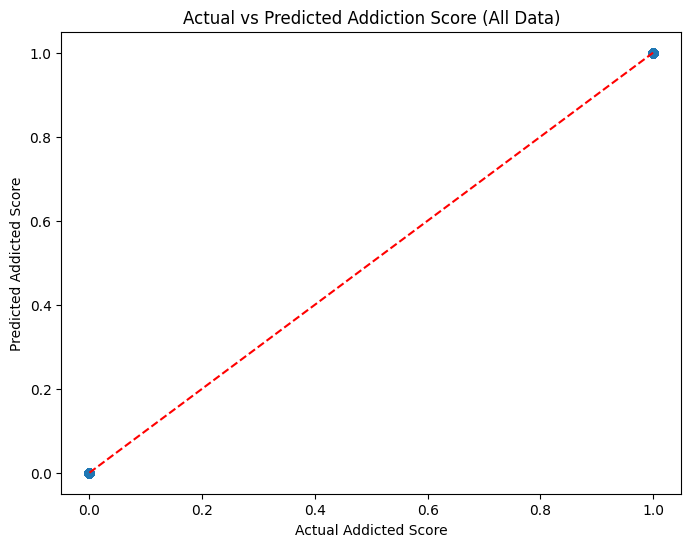

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Feature Selection Already Done

# Assume X_final and y are already defined
# X_final = selected features after correlation & importance filtering
# y = df_final_encoded['Addicted_Score']

# Define Model

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Cross-Validation Setup

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV

# Use negative MSE as scoring
neg_mse_scores = cross_val_score(rf_model, X_final, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model, X_final, y, cv=kf, scoring='r2')

# Convert negative MSE to positive RMSE
rmse_scores = np.sqrt(-neg_mse_scores)

# Display Results
print("Cross-Validation Results:")
print(f"RMSE Scores per fold: {rmse_scores}")
print(f"Average RMSE: {rmse_scores.mean():.3f}")
print(f"R² Scores per fold: {r2_scores}")
print(f"Average R²: {r2_scores.mean():.3f}")


# Fit final model on all data (optional)

rf_model.fit(X_final, y)
y_pred = rf_model.predict(X_final)

# Optional: Actual vs Predicted Plot
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Addicted Score")
plt.ylabel("Predicted Addicted Score")
plt.title("Actual vs Predicted Addiction Score (All Data)")
plt.show()


In [56]:
## Hyperparameter tuning

In [57]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Features and target
X = df_final_encoded.drop('Affects_Academic_Performance_Yes', axis=1)  # all numeric/encoded features
y = df_final_encoded['Affects_Academic_Performance_Yes']


**Code Explination**
- X → All the input features (numeric or encoded).
- y → Target variable (`1` = Yes, `0` = No), indicating whether social media affects academic performance.

In [58]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Code explination**
Splits your dataset into 80% training and 20% testing.
random_state=42 ensures reproducibility.

In [59]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],   # Gini vs Entropy
    'bootstrap': [True, False]          # Bootstrap sampling
}

**Code explination**
  
- n_estimators → Number of trees in the forest.
- max_depth → Maximum depth of each tree.
- min_samples_split → Minimum number of samples to split an internal node
- min_samples_leaf → Minimum samples in a leaf node.
- max_features → Number of features to consider when splitting a node.
- criterion → How splits are evaluated (gini or entropy).
- bootstrap → Whether to sample with replacement when building trees.

In [60]:
# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',  # optimize for classification
    n_jobs=-1,
    verbose=2
)

# Fit GridSearch
grid_search.fit(X_train, y_train)
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1052 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Code explination**
- **cv=5** → 5-fold cross-validation (data split into 5 parts, train on 4, validate on 1, repeat).
- **scoring='accuracy'** → Evaluates performance using accuracy.
- **n_jobs=-1** → Uses all CPU cores for faster computation.
- **verbose=2** → Shows progress during fitting.
- Tries **all combinations** in `param_grid` using 5-fold cross-validation.
- Finds the **best hyperparameters** based on highest accuracy.
- Prints the combination of parameters that gave the best performance.

In [61]:
# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        54
         1.0       1.00      1.00      1.00        87

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


Confusion Matrix:
 [[54  0]
 [ 0 87]]


**Code explination**
- **best_rf** → Model trained with the best hyperparameters.
- Predicts on the **test set** and prints:
- **Accuracy** → Overall percentage of correct predictions.
-  **Classification report** → Precision, Recall, F1-score for each class.
-  **Confusion matrix** → True Positives, True Negatives, False Positives, False Negatives.

### ✅ **Summary**

1. You define the model and all possible hyperparameters.
2. GridSearchCV tries all combinations with cross-validation.
3. It selects the combination that performs the best (highest accuracy).
4. You evaluate this best model on the test set to see real-world performance.